In [1]:
!pwd

/root/notebooks/pyspark-taxi.ipynb


In [2]:
#!gsutil help

In [3]:
!pip install google-compute-engine

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#!gsutil cp -r gs://. gs://anu_notebooks/pyspark-taxi.ipynb

AccessDeniedException: 403 476679779144-compute@developer.gserviceaccount.com does not have storage.objects.list access to anu_notebooks.


In [ ]:
#!gsutil cp gs://datasci-450/resources/notebooks/pyspark-taxi.ipynb .

In [5]:
!pip install pandas numpy matplotlib seaborn

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import pyspark
from pyspark.ml.linalg import Vectors
from pyspark import ml

In [7]:
storage_url = 'gs://anu_taxidata/yellow-2015-000000000000.csv'
taxi = (spark.read
           .format('csv')
           .load(storage_url,header=True,inferSchema=True))
taxi

DataFrame[vendor_id: int, pickup_datetime: string, dropoff_datetime: string, passenger_count: int, trip_distance: double, pickup_longitude: double, pickup_latitude: double, rate_code: int, store_and_fwd_flag: string, dropoff_longitude: double, dropoff_latitude: double, payment_type: int, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, imp_surcharge: double, total_amount: double]

In [8]:
taxi.columns

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'imp_surcharge',
 'total_amount']

In [9]:
taxi.count()

1000001

In [10]:
import pandas as pd
import matplotlib

In [11]:
taxi_sample = taxi.sample(withReplacement=False, fraction=0.1, seed=777)
taxi_local = taxi_sample.toPandas()
len(taxi_local)

100102

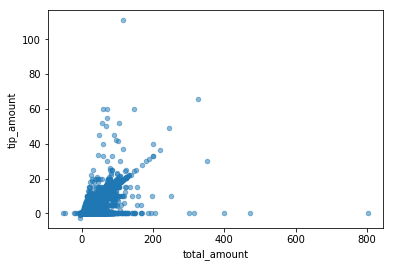

In [12]:
import matplotlib
%matplotlib inline
taxi_local.plot(kind='scatter',x='total_amount',y='tip_amount',alpha=0.5)

In [13]:
taxi_local.dropna()
len(taxi_local)

100102

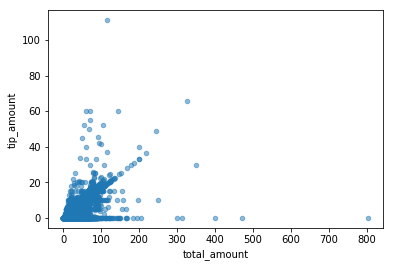

In [14]:
taxi_local= taxi_local[(taxi_local.tip_amount > 0.0) | (taxi_local.total_amount > 0.0) |
                      (taxi_local.tip_amount <= (taxi_local['total_amount']))]
len(taxi_local)
taxi_local.plot(kind='scatter',x='total_amount',y='tip_amount',alpha=0.5)

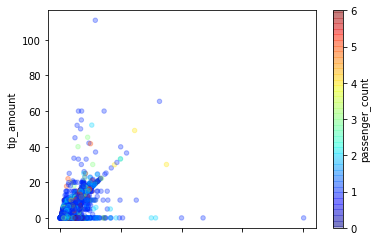

In [15]:
taxi_local.plot(kind='scatter',x='total_amount',y='tip_amount',c='passenger_count',alpha=0.3,colormap='jet')

In [16]:
import seaborn
%seaborn inline

ERROR:root:Line magic function `%seaborn` not found.


In [18]:
taxi_local.corr()

,vendor_id,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
vendor_id,1.000000,0.290208,0.017364,-0.049846,0.049955,-0.000211,-0.046828,0.046898,-0.015864,0.013531,0.006634,0.017011,0.010990,0.010177,0.063163,0.014486
passenger_count,0.290208,1.000000,0.015113,-0.022562,0.022534,-0.001003,-0.021836,0.021830,0.010620,0.010781,0.005704,0.005921,-0.003163,0.012871,0.012377,0.009892
trip_distance,0.017364,0.015113,1.000000,-0.012256,0.012748,0.214109,-0.018848,0.019063,-0.053992,0.872225,-0.061414,-0.127716,0.533137,0.602817,0.002621,0.880568
pickup_longitude,-0.049846,-0.022562,-0.012256,1.000000,-0.999978,0.068523,0.869595,-0.869624,0.000133,0.027364,-0.007144,-0.038681,0.003776,-0.006173,-0.012948,0.022447
pickup_latitude,0.049955,0.022534,0.012748,-0.999978,1.000000,-0.068530,-0.869586,0.869638,0.000157,-0.027094,0.006846,0.038778,-0.003563,0.007154,0.012961,-0.022089
rate_code,-0.000211,-0.001003,0.214109,0.068523,-0.068530,1.000000,0.060792,-0.061011,0.007591,0.408760,-0.062749,-0.392452,0.149794,0.223151,-0.285113,0.383096
dropoff_longitude,-0.046828,-0.021836,-0.018848,0.869595,-0.869586,0.060792,1.000000,-0.999920,0.013988,0.020533,-0.005475,-0.029592,-0.004316,-0.007630,-0.018198,0.015239
dropoff_latitude,0.046898,0.021830,0.019063,-0.869624,0.869638,-0.061011,-0.999920,1.000000,-0.013519,-0.020652,0.005385,0.030480,0.004106,0.007856,0.018182,-0.015352
payment_type,-0.015864,0.010620,-0.053992,0.000133,0.000157,0.007591,0.013988,-0.013519,1.000000,-0.059161,-0.017808,-0.001471,-0.529818,-0.036828,-0.012873,-0.148113
fare_amount,0.013531,0.010781,0.872225,0.027364,-0.027094,0.408760,0.020533,-0.020652,-0.059161,1.000000,-0.074564,-0.267921,0.534505,0.563133,-0.015686,0.982000


In [19]:
taxi_local[:3]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
0,2,2015-03-13 14:51:15 UTC,2015-03-13 15:19:19 UTC,1,11.28,-73.972084,40.756935,NaN,N,-73.864822,40.770325,1,32.5,0.0,0.5,7.73,5.33,0.3,46.36
1,2,2015-03-28 16:28:44 UTC,2015-03-28 16:38:45 UTC,1,2.63,-73.974602,40.742573,NaN,N,-73.987129,40.722481,1,11.0,0.0,0.5,1.00,0.00,0.3,12.80
2,1,2015-03-07 19:05:32 UTC,2015-03-07 19:16:54 UTC,1,2.20,-73.978783,40.762650,NaN,N,-73.979355,40.789497,1,10.0,0.0,0.5,1.20,0.00,0.3,12.00


In [20]:
from pyspark.sql.functions import udf

def trim_timezone(t):
    """'2015-03-04 09:10:47 UTC' => '2015-03-04 09:10:47'"""
    try:
        day, time, timezone = t.strip().split()
        return ' '.join([day, time])
    except Exception as e:
        return 'cast_fail'
# Convert standard py function into a UDF that Spark can package off
# to each of the workers (runs in py4j on worker nodes).
trim_timezone_udf=udf(trim_timezone)

def with_typed_columns(df):    
    return df.withColumn(
        'pickup',
        trim_timezone_udf('pickup_datetime').cast('timestamp')
    ).withColumn(
        'dropoff',
        trim_timezone_udf('dropoff_datetime').cast('timestamp')
    )

In [21]:
taxi_typed = with_typed_columns(taxi_sample)
taxi_typed.show(1)

+---------+--------------------+--------------------+---------------+-------------+------------------+------------------+---------+------------------+------------------+-----------------+------------+-----------+-----+-------+----------+------------+-------------+------------+-------------------+-------------------+
|vendor_id|     pickup_datetime|    dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|rate_code|store_and_fwd_flag| dropoff_longitude| dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|imp_surcharge|total_amount|             pickup|            dropoff|
+---------+--------------------+--------------------+---------------+-------------+------------------+------------------+---------+------------------+------------------+-----------------+------------+-----------+-----+-------+----------+------------+-------------+------------+-------------------+-------------------+
|        2|2015-03-13 14:51:...|2015-03-13 15:

In [23]:
# See available datframe transform funcs here
# http://spark.apache.org/docs/latest/api/python/pyspark.sql.html
from pyspark.sql.functions import *  # e.g., year, hour, date_format, ...

# Note transform_func('existing_column_name').alias('typed_column_name')
taxi_typed = taxi_typed.withColumn(
    'pickup_weekofyear', 
    weekofyear('pickup')
    ).withColumn(
    'pickup_dayofyear',
    dayofyear('pickup')
    ).withColumn(
    'pickup_weekday',
    date_format('pickup','E')
    ).withColumn(
    'dropoff_weekofyear',
    weekofyear('dropoff')
    ).withColumn(
    'dropoff_dayofyear',
    dayofyear('dropoff')
    ).withColumn(
    'dropoff_weekday',
    date_format('dropoff','E')) 

taxi_typed.show(1)

+---------+--------------------+--------------------+---------------+-------------+------------------+------------------+---------+------------------+------------------+-----------------+------------+-----------+-----+-------+----------+------------+-------------+------------+-------------------+-------------------+-----------------+----------------+--------------+------------------+-----------------+---------------+
|vendor_id|     pickup_datetime|    dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|rate_code|store_and_fwd_flag| dropoff_longitude| dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|imp_surcharge|total_amount|             pickup|            dropoff|pickup_weekofyear|pickup_dayofyear|pickup_weekday|dropoff_weekofyear|dropoff_dayofyear|dropoff_weekday|
+---------+--------------------+--------------------+---------------+-------------+------------------+------------------+---------+------------------+--------

In [26]:
from pyspark.ml.feature import *

def make_bucketer(input_col, output_col, sample, num_buckets=10):
    # Define the hyperparameters of the the discretizer 
    qd = pyspark.ml.feature.QuantileDiscretizer(
        numBuckets=num_buckets, 
        inputCol=input_col, 
        outputCol=output_col,)
    
    # Identify thresholds given the hyperparams for the sample of data
    bucketer = qd.fit(sample)
    
    return bucketer

In [27]:
geo_features = [
    'pickup_latitude', 'pickup_longitude', 
    'dropoff_latitude', 'dropoff_longitude'
]
NUM_BUCKETS = 20
geo_bucketers = {}
for geo_f in geo_features:
    geo_bucketer = make_bucketer(
        geo_f, "%s_q%d" %(geo_f,NUM_BUCKETS),
        taxi_typed,
        num_buckets =NUM_BUCKETS)
    geo_bucketers[geo_f] = geo_bucketer
geo_bucketers

{'dropoff_latitude': Bucketizer_4009b8f73342890def4d,
 'dropoff_longitude': Bucketizer_4a71bdce17be7746dea5,
 'pickup_latitude': Bucketizer_4bdfbb3dcc566344fa26,
 'pickup_longitude': Bucketizer_4c08a147e9e904b50aee}

In [28]:
type(geo_bucketers)

def bucketer_transform(bucketers, sample):
    for bucketer_key, bucketer_value in bucketers.iteritems():
        print "applying transform for ", bucketer_key
        sample = bucketer_value.transform(sample)
    return sample

In [29]:
final_df = bucketer_transform(geo_bucketers, taxi_typed)
final_df.columns

applying transform for  dropoff_longitude
applying transform for  pickup_latitude
applying transform for  dropoff_latitude
applying transform for  pickup_longitude


['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'imp_surcharge',
 'total_amount',
 'pickup',
 'dropoff',
 'pickup_weekofyear',
 'pickup_dayofyear',
 'pickup_weekday',
 'dropoff_weekofyear',
 'dropoff_dayofyear',
 'dropoff_weekday',
 'dropoff_longitude_q20',
 'pickup_latitude_q20',
 'dropoff_latitude_q20',
 'pickup_longitude_q20']

In [32]:
final_df.dropna()

DataFrame[vendor_id: int, pickup_datetime: string, dropoff_datetime: string, passenger_count: int, trip_distance: double, pickup_longitude: double, pickup_latitude: double, rate_code: int, store_and_fwd_flag: string, dropoff_longitude: double, dropoff_latitude: double, payment_type: int, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, imp_surcharge: double, total_amount: double, pickup: timestamp, dropoff: timestamp, pickup_weekofyear: int, pickup_dayofyear: int, pickup_weekday: string, dropoff_weekofyear: int, dropoff_dayofyear: int, dropoff_weekday: string, dropoff_longitude_q20: double, pickup_latitude_q20: double, dropoff_latitude_q20: double, pickup_longitude_q20: double]

In [33]:
def catToNumeric(column, df):
    outputIndexerCol = "%sIndex" %(column)
    stringIndexer = StringIndexer(inputCol=column, outputCol=outputIndexerCol)
    model = stringIndexer.fit(df)
    indexed = model.transform(df)

    outputEncoderCol = "%sVec" %(column)
    encoder = OneHotEncoder(inputCol=outputIndexerCol, outputCol=outputEncoderCol)
    encoded = encoder.transform(indexed)
    return encoded

In [34]:
categorical_features = [ 'payment_type','store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday']

In [35]:
indexedAndEncoded= catToNumeric("vendor_id", final_df)

for column in categorical_features:
    indexedAndEncoded = catToNumeric(column,indexedAndEncoded)

indexedAndEncoded.printSchema()


root
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- rate_code: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- imp_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup: timestamp (nullable = true)
 |-- dropoff: timestamp (nullable = true)
 |-- pickup_weekofyear: integer (nullable = true)
 |-- pick

In [36]:
indexedAndEncoded.show(1)

+---------+--------------------+--------------------+---------------+-------------+------------------+------------------+---------+------------------+------------------+-----------------+------------+-----------+-----+-------+----------+------------+-------------+------------+-------------------+-------------------+-----------------+----------------+--------------+------------------+-----------------+---------------+---------------------+-------------------+--------------------+--------------------+--------------+-------------+-----------------+---------------+-----------------------+---------------------+-------------------+-----------------+--------------------+------------------+
|vendor_id|     pickup_datetime|    dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|rate_code|store_and_fwd_flag| dropoff_longitude| dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|imp_surcharge|total_amount|             pickup|           

In [38]:
shuffled = indexedAndEncoded.randomSplit([0.8,0.2],80)
print(shuffled[0].count())
print(shuffled[1].count())

80126
19976


In [39]:
train = shuffled[0]
train.count()
train_X = train[feature_cols]
train_Y = train[target_col]


test = shuffled[1]
test_X = test[feature_cols]
test_Y = test[target_col]

In [41]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit, CrossValidator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
label_col = 'tip_amount'
feature_cols = feature_cols = [c for c in train.columns
                if c != label_col and not c in categorical_features
                and c != 'vendor_id'
                and c != 'pickup'
                and c != 'dropoff'
                and c != 'pickup_weekdayVec'
                and c != 'dropoff_weekdayVec'
                and c != 'rate_code'               
                and not c.endswith('_datetime')]

train_min = train[feature_cols + [label_col]]
test_min = test[feature_cols + [label_col]]
#feature_cols
train.count()
train.filter("rate_code is not NULL")

train.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in feature_cols]).show()
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
#assembler
train_xform = assembler.transform(train.select(feature_cols + [label_col]))
#train_xform.printSchema()
test_xform = assembler.transform(test.select(feature_cols + [label_col]))

taxi_train = train_xform.withColumnRenamed('tip_amount', 'label').select('label', 'features')
taxi_train

taxi_test = test_xform.withColumnRenamed('tip_amount', 'label').select('label', 'features')
taxi_test


In [68]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol="features")
rf.explainParams()

'cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)\ncheckpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)\nfeatureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n]. (default: auto)\nfeaturesCol: features column name. (default: features, current: features)\nimpurity: Criterion used for information gain calculation (case-insensitive). Supported options: variance (default: variance)\nlabelCol: label column name. (default: label)\nmaxBins: Max number of bins for discretizing continuous features.  Must be >=2 and

In [69]:


paramGrid = ParamGridBuilder()\
    .addGrid(rf.numTrees, [10.0, 20.0, 30.0]) \
    .addGrid(rf.maxDepth, [1.0, 6.0,10.0,15.0])\
    .addGrid(rf.maxBins, [20.0, 30.0])\
    .build()
    

rfEvalCV = RegressionEvaluator()
rfCrossVal = CrossValidator(estimator=dt,
                           estimatorParamMaps=paramGrid,
                           evaluator=rfEvalCV,
                           numFolds=8)
rfCVmodel = rfCrossVal.fit(taxi_train)

rfEvalCV.evaluate(rfCVmodel.transform(taxi_test), {rfEvalCV.metricName: "r2"})

0.7878973477517901

In [71]:
 rfCVmodel.transform(taxi_test).printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [73]:
bestModel = rfCVmodel.bestModel
finalPredictions = bestModel.transform(taxi_test)
rfEvalCV.evaluate(finalPredictions, {rfEvalCV.metricName: "r2"})

0.7878973477517901

In [78]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol="features")
gbt.explainParams()

'cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)\ncheckpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)\nfeaturesCol: features column name. (default: features, current: features)\nimpurity: Criterion used for information gain calculation (case-insensitive). Supported options: variance (default: variance)\nlabelCol: label column name. (default: label)\nlossType: Loss function which GBT tries to minimize (case-insensitive). Supported options: squared, absolute (default: squared)\nmaxBins: Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical f

In [82]:
paramGrid = ParamGridBuilder()\
    .addGrid(gbt.maxDepth, [1.0, 6.0,10.0,15.0])\
    .addGrid(gbt.maxBins, [20.0, 30.0])\
    .build()
    

gbtEvalCV = RegressionEvaluator()
gbtCrossVal = CrossValidator(estimator=gbt,
                           estimatorParamMaps=paramGrid,
                           evaluator=gbtEvalCV,
                           numFolds=8)
gbtCVmodel = gbtCrossVal.fit(taxi_train)

gbtEvalCV.evaluate(gbtCVmodel.transform(taxi_test), {gbtEvalCV.metricName: "r2"})

0.8155093645113122